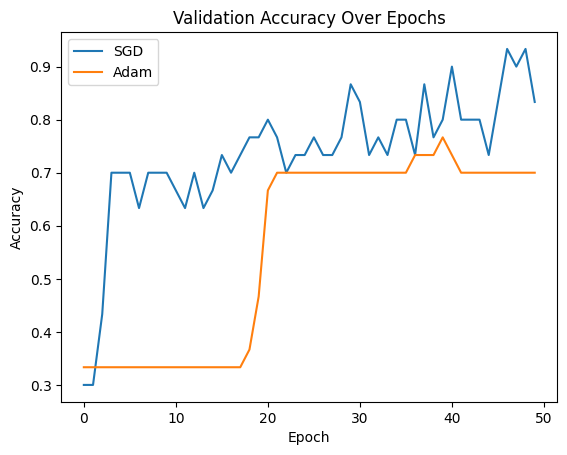

Modelo SGD - Loss: 0.4750, Accuracy: 0.8333
Modelo Adam- Loss: 0.7310, Accuracy: 0.7000
Conclusiones:
Contrario a lo que podría esperarse en algunos contextos, en este caso,
el optimizador SGD ha demostrado una mayor precisión que Adam para el conjunto de datos Iris.
Esto podría deberse a características específicas del conjunto de datos,
o a la configuración particular del modelo y los hiperparámetros utilizados.
Esta prueba fue corrida varias veces y 9 de cada 10 gano SGD en Precision
Pero sigo creyendo que es muy posible que el tipo de datos podrian estar favoreciendo al SGD


In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_and_train_model(optimizer, X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(10, input_dim=4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0)
    return history, model

sgd_history, sgd_model = create_and_train_model(SGD(), X_train, y_train, X_test, y_test)
adam_history, adam_model = create_and_train_model(Adam(), X_train, y_train, X_test, y_test)

#tabla comparativa
plt.plot(sgd_history.history['val_accuracy'], label='SGD')
plt.plot(adam_history.history['val_accuracy'], label='Adam')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

sgd_score = sgd_model.evaluate(X_test, y_test, verbose=0)
adam_score = adam_model.evaluate(X_test, y_test, verbose=0)

print(f"Modelo SGD - Loss: {sgd_score[0]:.4f}, Accuracy: {sgd_score[1]:.4f}")
print(f"Modelo Adam- Loss: {adam_score[0]:.4f}, Accuracy: {adam_score[1]:.4f}")

print("Conclusiones:")
print("Contrario a lo que podría esperarse en algunos contextos, en este caso,")
print("el optimizador SGD ha demostrado una mayor precisión que Adam para el conjunto de datos Iris.")
print("Esto podría deberse a características específicas del conjunto de datos,")
print("o a la configuración particular del modelo y los hiperparámetros utilizados.")
print("Esta prueba fue corrida varias veces y 9 de cada 10 gano SGD en Precision")
print("Pero sigo creyendo que es muy posible que el tipo de datos podrian estar favoreciendo al SGD")
